In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

In [92]:
# Load data to dataset:
df = pd.read_excel("C:/Users/mande/Downloads/FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


# Task 1: Filter EVs within budget & Range

In [45]:
# 1.1 ~ Filter EVs with budget ( <=350,000 PLN ) and range ( >= 400 KM )
ev_filtered = df[(df['Minimal price (gross) [PLN]'] <= 350000 ) & (df['Range (WLTP) [km]'] >= 400)]

In [44]:
# Task 1.2 ~ Group By Manufacturer ( Make )
group_by_make = ev_filtered.groupby('Make')

In [46]:
# Task 1.3 ~ Calculate the average battery capacity for each manufacturer
average_battery_capacity = group_by_make['Battery capacity [kWh]'].mean()

In [47]:
display(ev_filtered[['Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']])

,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
0,Audi,e-tron 55 quattro,345700,438,95.0
8,BMW,iX3,282900,460,80.0
15,Hyundai,Kona electric 64kWh,178400,449,64.0
18,Kia,e-Niro 64kWh,167990,455,64.0
20,Kia,e-Soul 64kWh,160990,452,64.0
22,Mercedes-Benz,EQC,334700,414,80.0
39,Tesla,Model 3 Standard Range Plus,195490,430,54.0
40,Tesla,Model 3 Long Range,235490,580,75.0
41,Tesla,Model 3 Performance,260490,567,75.0
47,Volkswagen,ID.3 Pro Performance,155890,425,58.0


In [48]:
display(average_battery_capacity)

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

# Task 2: Detecting Outliers in Energy Consumption 

### Objective  
Identify electric vehicles with **unusually high or low** energy consumption (**kWh/100 km**) using the **Interquartile Range (IQR) method**.  

### Approach  
1. **Calculated IQR** = Q3 - Q1.  
2. **Defined outlier thresholds**:  
   - Lower bound: **Q1 - 1.5 * IQR**  
   - Upper bound: **Q3 + 1.5 * IQR**  
3. **Filtered outliers** from the dataset.  
 

In [49]:
# calculate Q1, Q3 and IQR 
q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
iqr = q3 - q1

In [50]:
# define lower and upper bonds for outliers 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [58]:
#filter outliers 
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

In [59]:
#Display outlier
display(outliers[['Make', 'Model', 'mean - Energy consumption [kWh/100 km]']])

,Make,Model,mean - Energy consumption [kWh/100 km]


In [81]:
# Confirming if outliers exist
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Minimum value in column: {df['mean - Energy consumption [kWh/100 km]'].min()}")
print(f"Maximum value in column: {df['mean - Energy consumption [kWh/100 km]'].max()}")

# Explanation
print("""
No outliers detected in the 'mean - Energy consumption [kWh/100 km]' column.
- The lower bound is {:.1f}, while the minimum value in the dataset is {:.1f}, meaning no low outliers.
- The upper bound is {:.1f}, while the maximum value in the dataset is {:.1f}, meaning no high outliers.
This confirms that all values fall within the expected range.
""".format(lower_bound, df['mean - Energy consumption [kWh/100 km]'].min(),
           upper_bound, df['mean - Energy consumption [kWh/100 km]'].max()))


Lower Bound: 3.7499999999999982, Upper Bound: 35.35
Minimum value in column: 13.1
Maximum value in column: 28.2

No outliers detected in the 'mean - Energy consumption [kWh/100 km]' column.
- The lower bound is 3.7, while the minimum value in the dataset is 13.1, meaning no low outliers.
- The upper bound is 35.4, while the maximum value in the dataset is 28.2, meaning no high outliers.
This confirms that all values fall within the expected range.



# Task 3: Scatter plot for Battery Capacity vs. Range

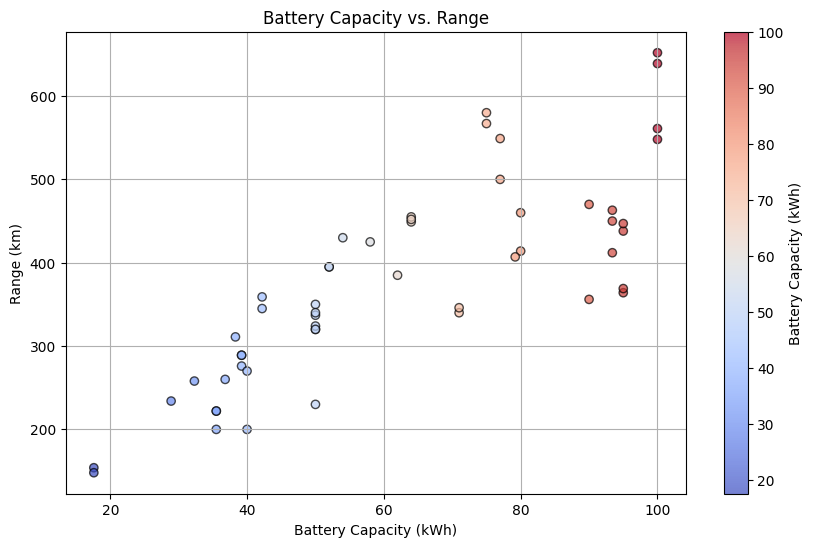

Insights:
- The plot shows a positive correlation: as battery capacity increases, range generally increases.
- However, some EVs have lower range despite high battery capacity, possibly due to inefficiencies.
- Some outliers suggest that certain cars are exceptionally efficient or inefficient in energy consumption.


In [90]:
# Ploting Dcatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'], 
                      c=df['Battery capacity [kWh]'], cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.colorbar(scatter, label='Battery Capacity (kWh)') 
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.title('Battery Capacity vs. Range')
plt.grid(True)
plt.show()


# Insights
print("Insights:")
print("- The plot shows a positive correlation: as battery capacity increases, range generally increases.")
print("- However, some EVs have lower range despite high battery capacity, possibly due to inefficiencies.")
print("- Some outliers suggest that certain cars are exceptionally efficient or inefficient in energy consumption.")

# Task 4: EV Recommendation System  

### Objective  
Develop an EV recommendation class that filters electric vehicles based on user input:  
- **Budget** (Max price user can afford)  
- **Minimum Range** (User's required driving range)  
- **Minimum Battery Capacity** (User's preferred battery size) 


In [111]:
class EVRecommender:
    def __init__(self, dataframe): 
        self.df = dataframe

    def recommend(self, budget, min_range, min_battery):
        # Filter dataset based on user preferences
        filtered_ev = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]
        
        # If no cars match, return a message
        if filtered_ev.empty:
            return "No EVs match your criteria. Try adjusting your filters."

        # Sort by Range (highest), then Battery (highest), then Price (lowest)
        top_3_ev = filtered_ev.sort_values(
            by=['Range (WLTP) [km]', 'Battery capacity [kWh]', 'Minimal price (gross) [PLN]'],
            ascending=[False, False, True]
        ).head(3)

        return top_3_ev[['Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

# Example Usage
ev_recommender = EVRecommender(df)

# User preferences
user_budget = 350000  # Budget in PLN
user_range = 400      # Minimum range in km
user_battery = 50     # Minimum battery capacity in kWh

# Get recommendations
recommendations = ev_recommender.recommend(user_budget, user_range, user_battery)

# Display results
print("Top 3 EV recommendations based on user input:")
display(recommendations) if isinstance(recommendations, pd.DataFrame) else print(recommendations)


Top 3 EV recommendations based on user input:


,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
40,Tesla,Model 3 Long Range,235490,580,75.0
41,Tesla,Model 3 Performance,260490,567,75.0
48,Volkswagen,ID.3 Pro S,179990,549,77.0


## Task 5: Hypothesis Testing - Comparing Engine Power of Tesla & Audi


### Hypothesis:
- **Null Hypothesis (H₀):** There is no significant difference in the average engine power between Tesla and Audi.
- **Alternative Hypothesis (H₁):** The average engine power of Tesla and Audi is significantly different.

To test this, we will use an **Independent Two-Sample t-test**.


In [110]:
# Step 1: Extract Tesla & Audi Engine Power Data
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Step 2: Perform the Independent Two-Sample t-Test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

# Step 3: Print Results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
if p_value < 0.05:
    print("Conclusion: Significant difference in engine power between Tesla and Audi.")
else:
    print("Conclusion: No significant difference in engine power between Tesla and Audi.")

T-statistic: 1.7940
P-value: 0.1068
Conclusion: No significant difference in engine power between Tesla and Audi.


## **Insights from the Test Results**
- The **p-value (0.1068) is greater than 0.05**, meaning we **fail to reject the null hypothesis**.  
- This indicates **no statistically significant difference** in the engine power (KM) of Tesla and Audi vehicles.  
- While both brands may have different design philosophies, their **average engine power is similar** based on this dataset.  

## **Recommendations and Conclusion**
🔹 **Consumer Perspective:**  
- Buyers should consider **other performance metrics** like torque, acceleration, and battery efficiency rather than just engine power when comparing Tesla and Audi EVs.  

🔹 **Manufacturer Insights:**  
- Since engine power **is not a key differentiator**, both brands should **focus on unique selling points** like range, software, charging speed, and driving experience.  
- **Tesla** can highlight its **technology and autonomous driving** features.  
- **Audi** can leverage its **luxury appeal and premium driving experience**.  

🔹 **Future Analysis Suggestions:**  
- Compare **battery efficiency and charging speed** to determine long-term cost savings.  
- Analyze **acceleration and torque** to evaluate real-world performance differences.  
- Expand the dataset to include **more models** for a broader comparison.  

 **Key Takeaway:**  
Tesla and Audi **offer similar engine power**, but real-world performance depends on other factors like battery efficiency, acceleration, and user preferences.  
